In [13]:
from src.raw_datset import raw_dataset, StatisticsFile
import os
from src.plots import plot_categorical_column, plot_stacked_errors_with_percent_legend, plot_stacked_errors_with_percent_legend_by_annotator_id

directory = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01-2025-Annotations/2025-04-30"
local_files = raw_dataset(directory)
# local_files.reset_errors()

# Error Characterizer
Enter the number corresponding to the type of error

0. No Error
1. Uncentered Box
2. Severely Uncentered Box
3. Missed Target
4. Blank Box
5. Silt Transpose Error
6. Occlusion [Edge or star]
7. Other
8. Unknown
9. Long Satellite Streak

85it [12:26,  8.79s/it]


KeyboardInterrupt: 

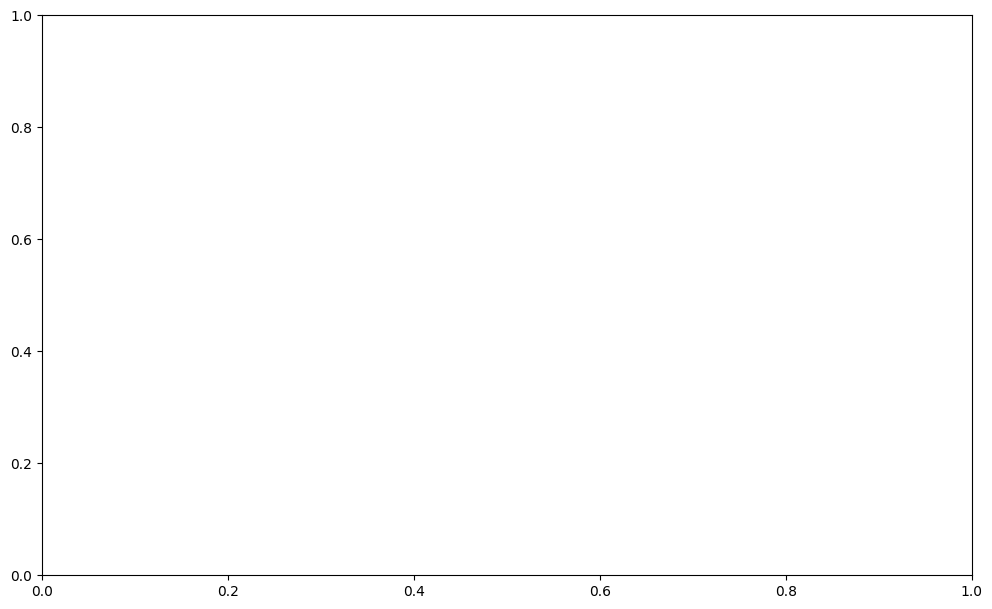

In [14]:
local_files = raw_dataset(directory)
local_files.characterize_errors()

# Generate Error Report

Index(['fits_file', 'sensor', 'QA', 'labeler_id', 'request_id', 'created',
       'updated', 'num_objects', 'error_type', 'error_type_str'],
      dtype='object')

Column: QA
-----------
Value  Count Percentage
False     89    100.00%

Column: error_type_str
-----------------------
                   Value  Count Percentage
                No Error     79     88.76%
                 Unknown      7      7.87%
   Long Satellite Streak      2      2.25%
Occlusion [Edge or star]      1      1.12%

Column: created
----------------
     Value  Count Percentage
2025-05-01     33     37.08%
2025-05-02     31     34.83%
2025-04-30     24     26.97%
2025-05-05      1      1.12%


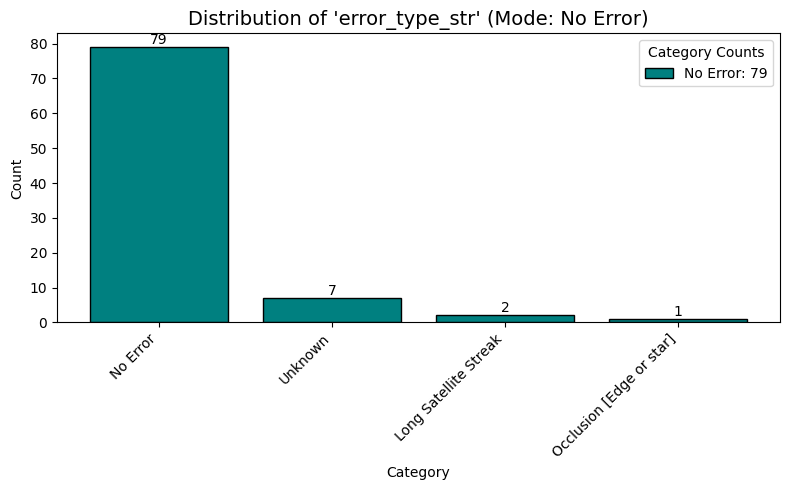

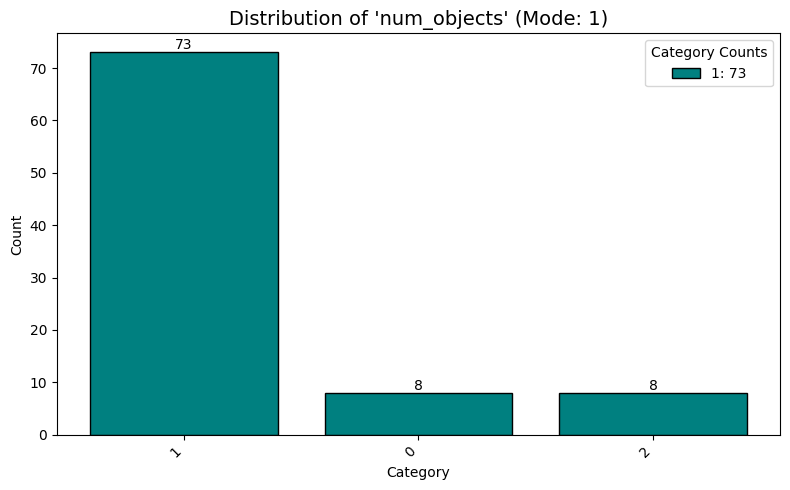

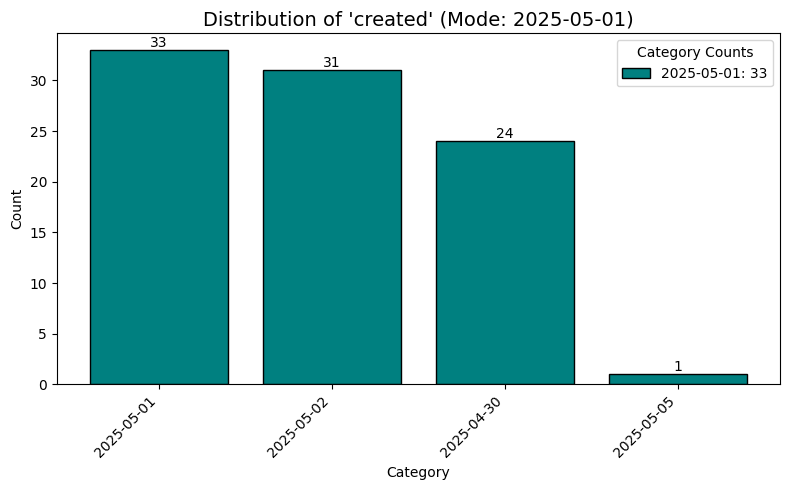

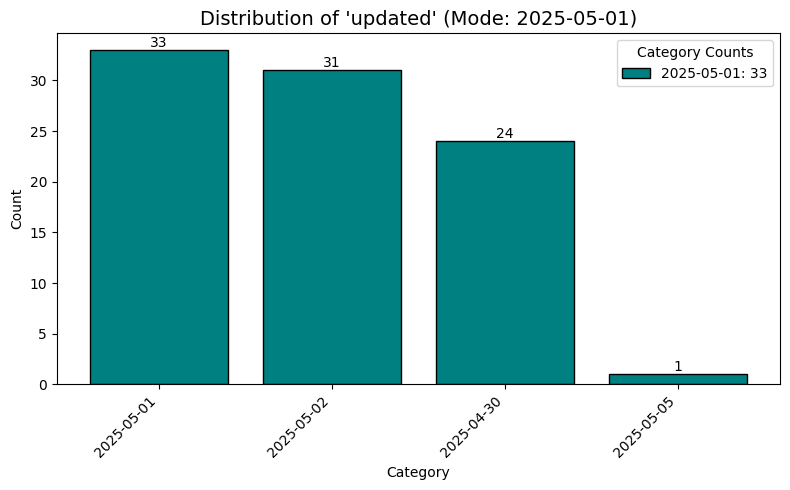

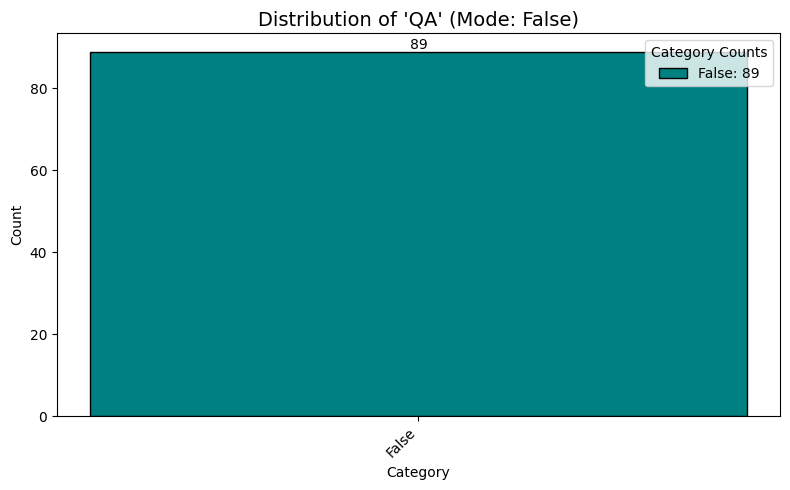

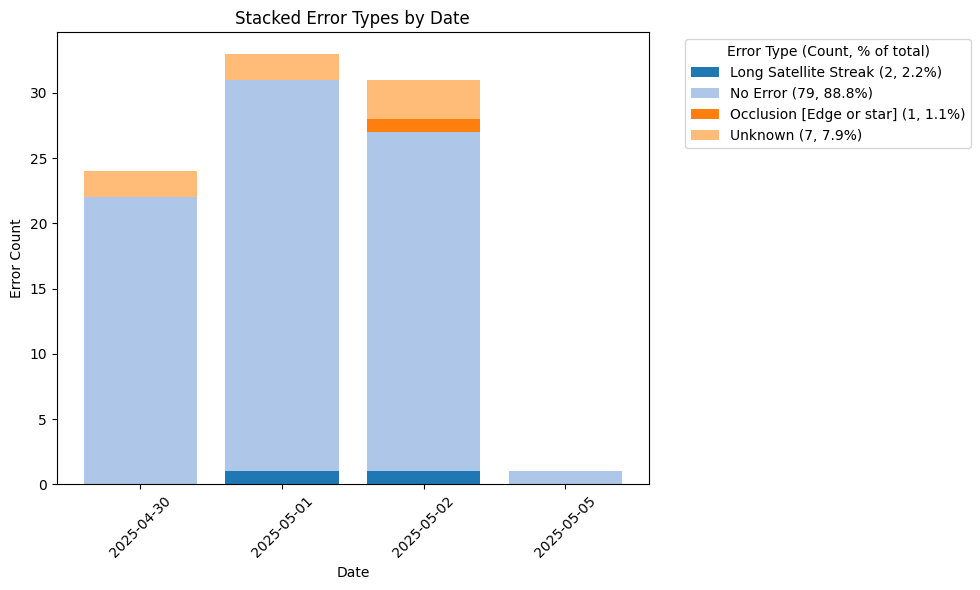

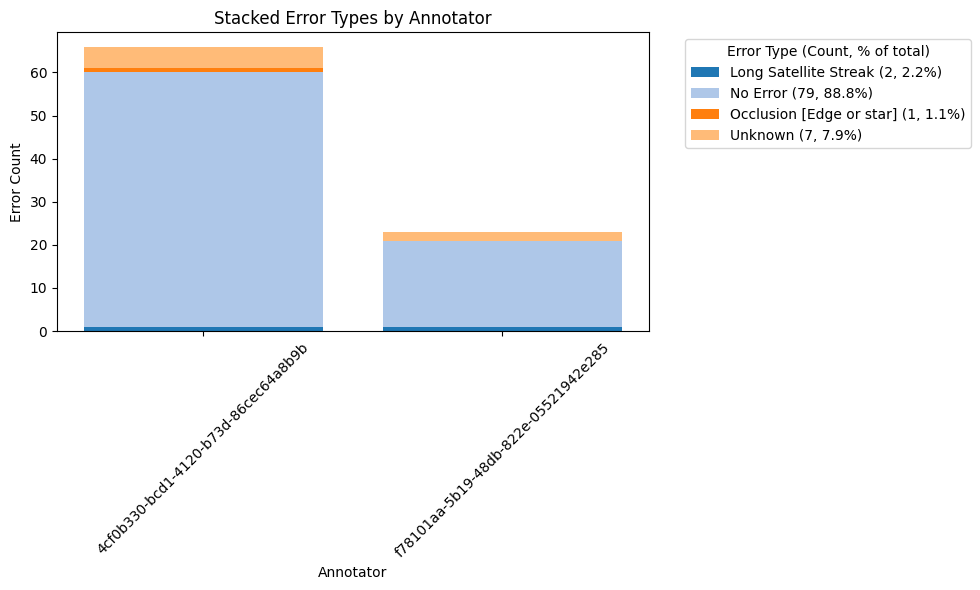

In [15]:
error_file = StatisticsFile().load(os.path.join(directory, "errors.pkl"))
errors_dataset = error_file.sample_attributes

print(errors_dataset.columns)

error_file.summarize_sample_attribute_columns("sample_attributes", ["QA", "error_type_str", "created"])
plot_categorical_column(errors_dataset["error_type_str"])
plot_categorical_column(errors_dataset["num_objects"])
plot_categorical_column(errors_dataset["created"])
plot_categorical_column(errors_dataset["updated"])
plot_categorical_column(errors_dataset["QA"])

# Plot
plot_stacked_errors_with_percent_legend(errors_dataset)
plot_stacked_errors_with_percent_legend_by_annotator_id(errors_dataset)